## The data is from Computed Tomography (CT)

In [1]:
# Starting with importing and understand the datatype and the shape of image

In [2]:
# Import ImageIO
import imageio

path='./tcia-chest-ct-sample/'
path1='./sunnybrook-cardiac-mr/'
# Load "chest-220.dcm"
im = imageio.imread(path + "chest-220.dcm")

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


In [3]:
# Exploring the metadata disposal

In [4]:
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [5]:
## Getting some information from the metadata 

In [6]:
print(f"The Patient name is: {im.meta['PatientName']}, it is a {im.meta['PatientSex']}and has {im.meta['PatientWeight']} kgs")

The Patient name is: STS_007, it is a F and has 82.0 kgs


# Let's plot our image to analyse

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.axis('off')
plt.show()


<Figure size 1500x900 with 1 Axes>

## Ploting with contrast of gray scale

Using <b>vmin=-200</b> and <b>vmax=200 </b> to increase the contrast (i.e., the distance between the brightest and darkest colors is smaller than before).

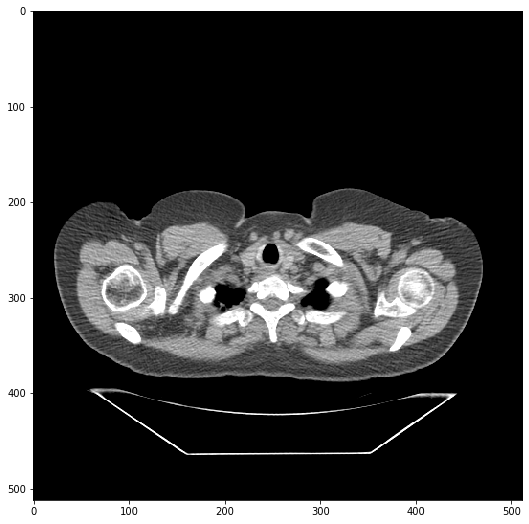

In [8]:
plt.figure(figsize=(15,9))

# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)

plt.show()

# Stacking Images (multi dimensional data)
I will use NumPy's stack() function to combine several 2D arrays into a 3D volume. 
- By convention, volumetric data should be stacked along the first dimension: 
<b>vol[plane, row, col].</b>

In [9]:
import numpy as np

# Read in each 2D image
im1 = imageio.imread(path+'chest-220.dcm')
im2 = imageio.imread(path+"chest-221.dcm")
im3 = imageio.imread(path+"chest-222.dcm")

# Stack images into a volume
vol = np.stack([im1, im2, im3])
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


- Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.

# Load volumes
ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "tcia-chest-ct" folder, which contains 25 DICOM images.

In [10]:
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct-sample")

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


In [11]:
# image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


## Field of view
The amount of physical space covered by an image is its field of view, which is calculated from two properties:

> <b>Array shape</b>, the number of data elements on each axis. Can be accessed with the shape attribute. <br>
> <b>Sampling resolution</b>, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).

For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of <b>vol</b>. All values are in millimeters.

In [12]:
vol.meta['sampling']

(3.269999999999996, 0.976562, 0.976562)

In [13]:
## Calc to get the correct value

In [14]:
a, b, c = vol.meta['sampling']
a1, b1, c1 = vol.shape

In [15]:
a*a1, b*b1, c*c1

(16.34999999999998, 499.999744, 499.999744)

# Generate subplots

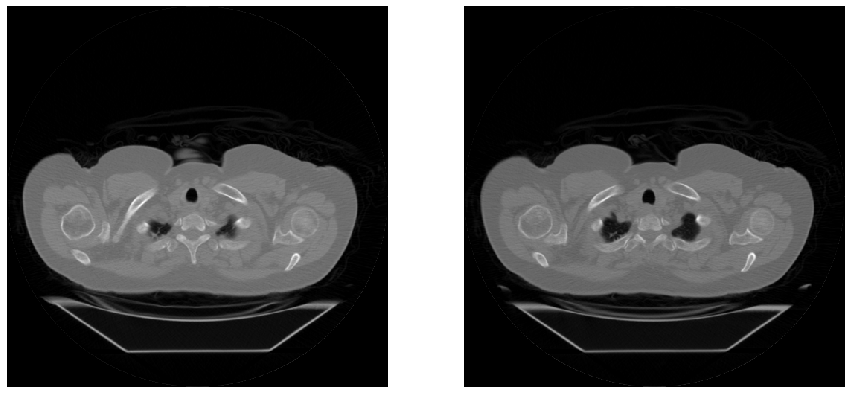

In [20]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=1,ncols=2, 
                         figsize=(15,9))


# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

# Remove ticks/labels and render
axes[0].axis("off")
axes[1].axis("off")

plt.show()

## Reading a second image to work

In [21]:
im1 = imageio.imread(path1 + "SCD2001_006/SCD2001_MR_117.dcm")

# Seting the path to read all folder

In [27]:
# Load the "tcia-chest-ct" directory
vol1 = imageio.volread(path1 + "SCD2001_006")

Reading DICOM (examining files): 1/21 files (4.8%21/21 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 21/21  (100.0%)


In [28]:
vol1.meta['sampling']

(0.0, 1.367188, 1.367188)

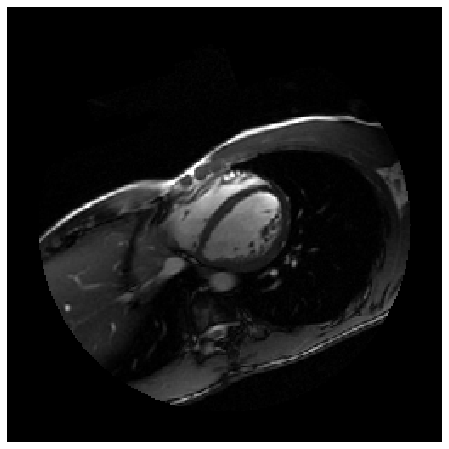

In [32]:
plt.figure(figsize=(12,8))

plt.imshow(im1, cmap='gray')

plt.axis('off')
plt.show()

# Slice 3D images


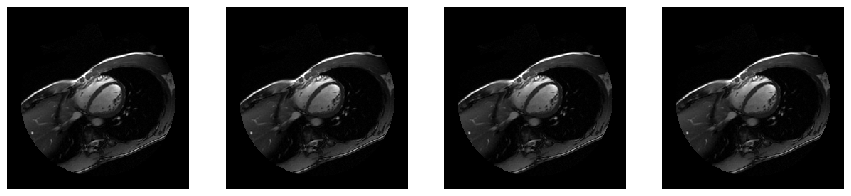

In [37]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,9))

# Loop through subplots and draw image
for ii in range(4):
    # if we had much pictures it would be like a gif
    im = vol1[ii*5, :, :]
    axes[ii].imshow(im1, cmap='gray')
    axes[ii].axis("off")

# Render the figure
plt.show()


<img src="https://assets.datacamp.com/production/repositories/2085/datasets/755e2178082059cd0735af51ca56193ac98eb181/Ch1_L3_Axial16x9.gif" alt="Flowers in Chania">

# Plot other views

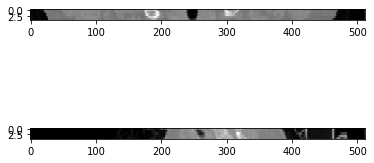

In [39]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta["sampling"]
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)

plt.show()

## Masks and Filters


Data type: uint8
Min. value: 3
Max value: 224


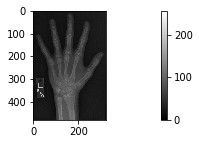

In [40]:
# Load the hand radiograph
im_xray = imageio.imread("hand.png")

print('Data type:', im_xray.dtype)
print('Min. value:', im_xray.min())
print('Max value:', im_xray.max())

plt.figure(figsize = (20,2))

# Plot the grayscale image
plt.imshow(im_xray, vmin=0, vmax=255, cmap='gray')

plt.colorbar()
plt.show()
#format_and_render_plot()

# Histograms
<b>Histograms</b> display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the <b>cumulative distribution function</b>. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in <b>im</b> by calculating the histogram and cumulative distribution function and displaying them together.

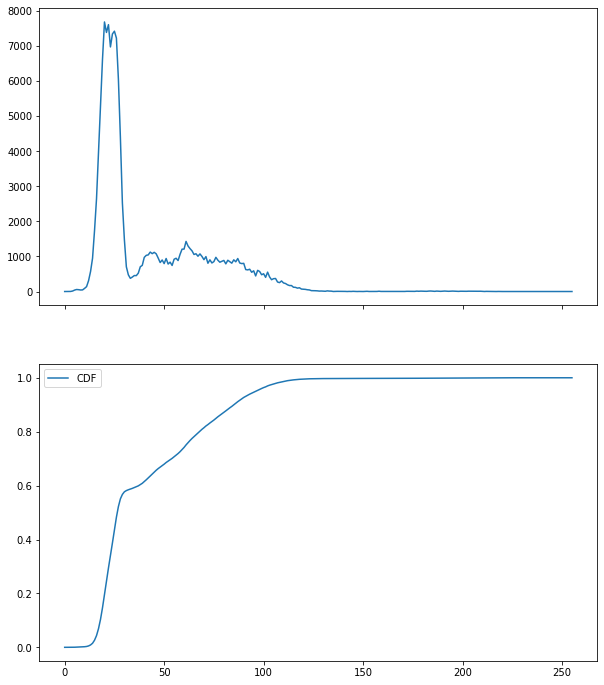

In [41]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im_xray, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,12))
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
# format_and_render_plot()
plt.legend()
plt.show()

## Create a mask

Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

I create masks using simple intensity threshold to differentiate between skin and bone in the hand radiograph

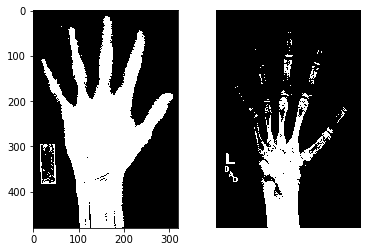

In [42]:
# Create skin and bone masks
mask_bone = im_xray >= 80
mask_skin = (im_xray >= 45) & (im_xray < 120)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap="gray")
axes[1].imshow(mask_bone, cmap="gray")
plt.axis('off')
plt.show()

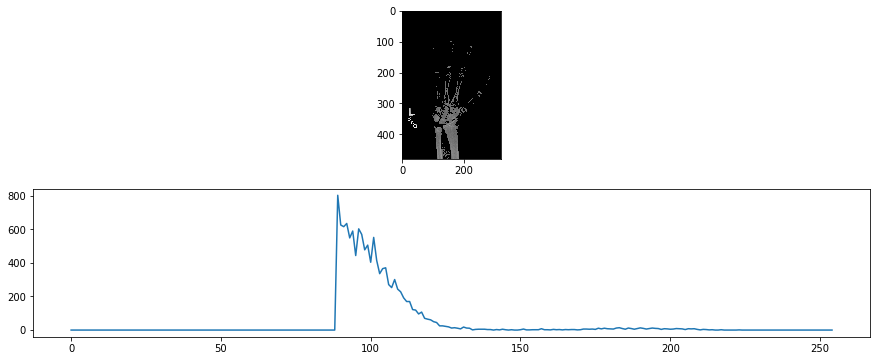

In [43]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
mask_bone = im_xray >= 90
im_bone = np.where(mask_bone, im_xray, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1, figsize=(15,6))
axes[0].imshow(im_bone, cmap='gray')
axes[1].plot(hist)

# Tune a mask

Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

- binary_dilation: Add pixels along edges
- binary_erosion: Remove pixels along edges
- binary_opening: Erode then dilate, "opening" areas near edges
- binary_closing: Dilate then erode, "filling in" holes

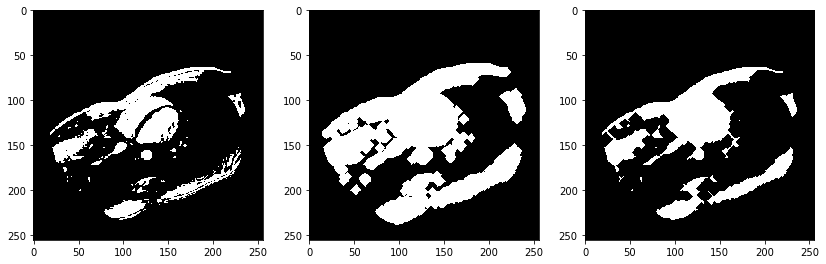

In [44]:
# Create and tune bone mask
mask_bone = im >= 50
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3, figsize=(14,6))
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')
axes[2].imshow(mask_closed, cmap='gray')


plt.show()

# Filter convolutions

In [45]:
# Set filter weights
weights = [[0.11, 0.11, .11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, .11]]

##(These are called "footprints" and "kernels" 

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights=weights)

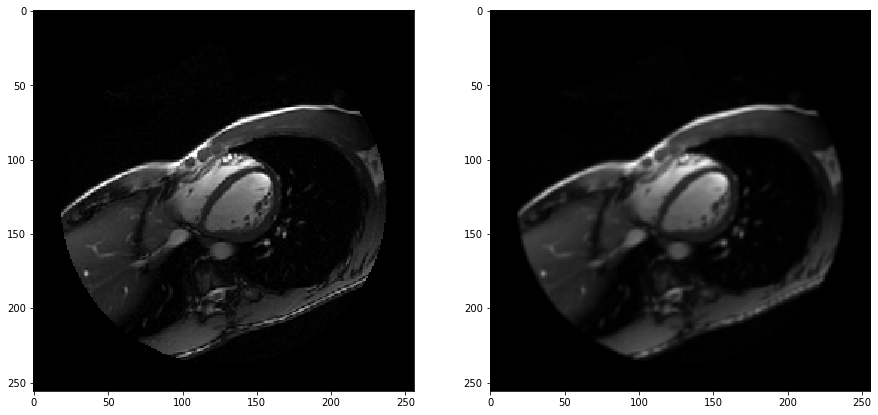

In [46]:
# Plot the images
fig, axes = plt.subplots(1,2, figsize=(15,7))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_filt, cmap='gray')

plt.show()

# Smoothing
Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.

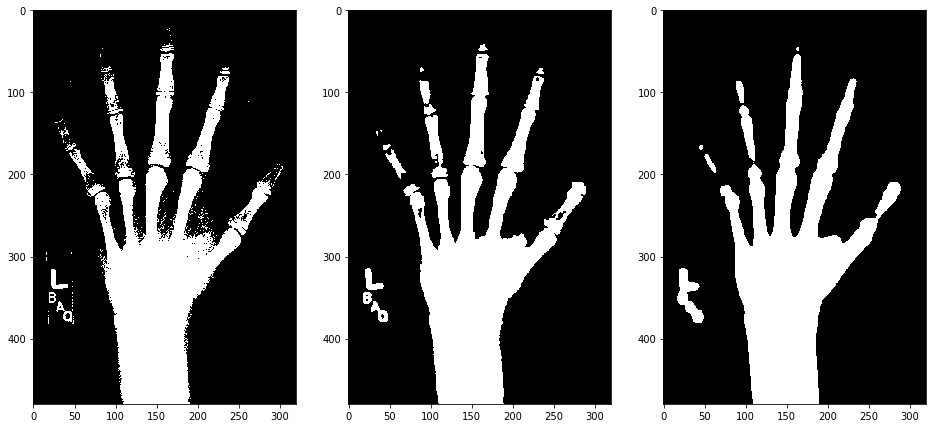

In [47]:
# Smooth "im" with Gaussian filters
# 1 stdev from the mean
im_s1 = ndi.gaussian_filter(im_xray, sigma=1)

# 3 stdev from the mean
im_s3 = ndi.gaussian_filter(im_xray, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3, figsize=(16,8))
axes[0].imshow(im_xray >= 65, cmap='gray')
axes[1].imshow(im_s1 >= 65, cmap='gray')
axes[2].imshow(im_s3 >= 65, cmap='gray')


# Detect edges (1)
Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane

>[[+1, +1, +1], <br>
        >[ 0,  0,  0],<br>
>           [-1, -1, -1]]<br>

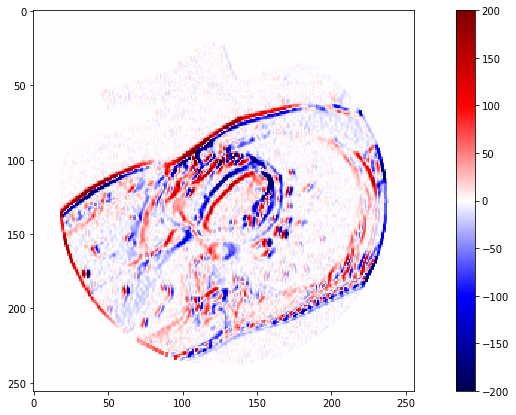

In [48]:
# Set weights to detect vertical edges
weights = [[+1, 0, -1], [+1, 0, -1], [+1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

plt.figure(figsize=(15,7))
# Draw the image in color

plt.imshow(edges, cmap="seismic", vmin=-200, vmax=200)
plt.colorbar()

plt.show()

In [49]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 

/home/leonardo/anaconda3/envs/sklearn_ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


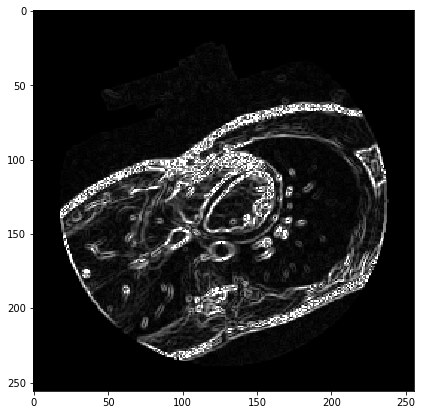

In [50]:
edges = np.sqrt(np.square(sobel_ax0)+np.square(sobel_ax1))

# Plot edge magnitude
plt.figure(figsize=(12,7))
plt.imshow(edges, cmap="gray", vmax=250)
plt.show()

# Measurement
Now, go to the heart of image analysis: object measurement. Using a 4D cardiac time series, you'll determine if a patient is likely to have heart disease. Along the way, you'll learn the fundamentals of image segmentation, object labeling, and morphological measurement.

In [51]:
### Segment the heart
im1 = imageio.imread(path1 + "SCD2001_006/SCD2001_MR_117.dcm")

In [52]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [53]:

# Smooth intensity values
im_filt = ndi.median_filter(im1, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 65, 1, 0)
mask = ndi.binary_closing(mask_start )

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

Num. Labels: 30


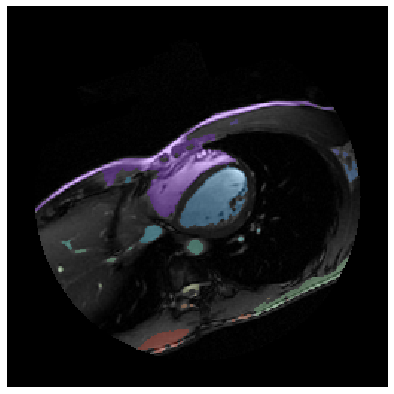

In [54]:
# Create a `labels` overlay
overlay = np.where(mask, labels, np.nan)

plt.figure(figsize=(12,7))

# Use imshow to plot the overlay
plt.imshow(im1, cmap='gray', )
plt.imshow(overlay, cmap='rainbow', alpha=.25)
plt.axis('off')
plt.show()

In [55]:
## Robust image segmentation is an entire research domain, 
## but the simple principle is to leverage intensity and location
## information to differentiate objects of interest from the background. 
## Once labeled, the objects can be manipulated easily.

# Selecting objects

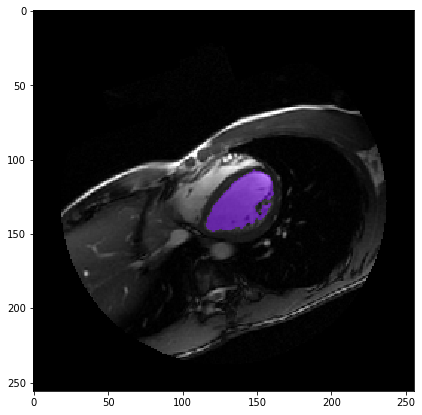

In [56]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128] ## 128,128 is the middle of the image 256,256
lv_mask = np.where(labels == lv_val, 1, np.nan)

plt.figure(figsize=(12,7))
# Overlay selected label
plt.imshow(im1, cmap='gray')
plt.imshow(lv_mask, cmap='rainbow', alpha=.50)
plt.show()

## Extracting objects

Number of objects: 1
Indices for first box: (slice(107, 149, None), slice(116, 162, None))


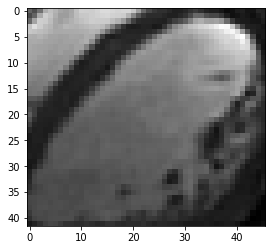

In [57]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128] # to set the "centroid" of label 
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im1[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv, cmap='gray')

plt.show()

## Measure variance

In [58]:
# Variance for all pixels
var_all = ndi.variance(vol1, labels=None, index=None)
print('All pixels:', var_all)

# Variance for labeled pixels
var_labels = ndi.variance(vol1, labels=labels, index=None)
print('Labeled pixels:', var_labels)

# Variance for each object
var_objects = ndi.variance(vol1, labels=labels, index=[1,2])
print('Left ventricle:', var_objects[0])
print('Other tissue:', var_objects[1])

All pixels: 1024.5268017215453
Labeled pixels: 2465.3730831991993
Left ventricle: 3252.747988592184
Other tissue: 116.79512219702687


# Separate histograms


In [59]:
# Create histograms for selected pixels
hist1 = ndi.histogram(vol1, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol1, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol1, 0, 255, 256, labels=labels, index=1)

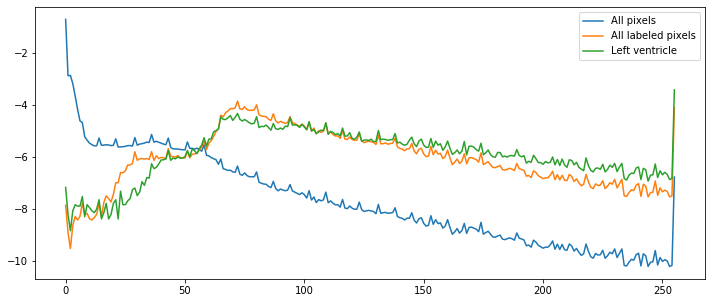

In [62]:
# Create histograms for selected pixels
hist1 = ndi.histogram(vol1, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol1, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol1, 0, 255, 256, labels=labels, index=1)

plt.figure(figsize=(12,5))
# Plot the histogram density

plt.plot(np.log(hist1 / hist1.sum()), label='All pixels')
plt.plot(np.log(hist2 / hist2.sum()), label='All labeled pixels')
plt.plot(np.log(hist3 / hist3.sum()), label='Left ventricle')
plt.legend()
plt.show()

# Measuring Morphology ( Shape and Size )

In [63]:
## mensuring the volume of the left ventricle in one 3D image (vol).

ndi.sum(1, labels, index=1)

2273

In [64]:
d0, d1, d2 = vol1.meta['sampling']
dvoxel = d1 * d2

nvoxels=ndi.sum(1, labels, index=1)

volume = dvoxel * nvoxels

volume

4248.698481152912

# Calculate distance

In [67]:
# Calculate left ventricle distances
lv = np.where(labels == 1, 1, 0)
dists = ndi.distance_transform_edt(lv, sampling=vol1.meta["sampling"][1:])

# Report on distances
print('Max distance (mm):', ndi.maximum(dists))
print('Max location:', ndi.maximum_position(dists))


## NOTE THE PLOT BELOW IS GIVEN ERROR

# Plot overlay of distances
overlay = np.where(dists[5] > 0, dists[5], np.nan) 
#plt.imshow(overlay, cmap='hot')

Max distance (mm): 15.588341590904403
Max location: (113, 113)


# Pinpoint center of mass


Label 1 center: (10.209114792563632, 102.7403106180316, 113.93371541039355)
Label 2 center: (10.023181193111126, 68.42908126514308, 214.6753650710497)
Label 3 center: (10.190585985828365, 77.6261387920369, 152.22056011697222)
Label 4 center: (10.001437371663245, 97.32951745379877, 220.62643737166326)


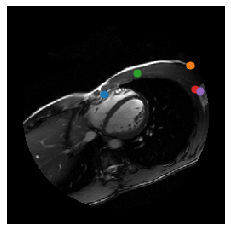

In [69]:
# Extract centers of mass for objects 1 and 2
coms = ndi.center_of_mass(vol1, labels, index=[1, 2, 3, 4, 5])
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])
print('Label 3 center:', coms[2])
print('Label 4 center:', coms[3])

# Add marks to plot
for c0, c1, c2 in coms:
    plt.imshow(im1, cmap='gray', interpolation=None)
    plt.scatter(c2, c1, s=50, marker='o')

plt.axis('off')
plt.show()

# Summarize the time series
Calculating the ejection fraction

In [ ]:
# Create an empty time series
ts = np.zeros(20)

# Calculate volume at each voxel
d0, d1, d2, d3 = vol_ts.meta["sampling"]
dvoxel = d1 * d2 * d3

# Loop over the labeled arrays
for t in range(20):
    nvoxels = ndi.sum(1, labels[t], index=1)
    ts[t] = nvoxels * dvoxel

# Plot the data
plt.plot(ts)

# Measure ejection fraction
the ejection fraction is defined as Vmax - Vmin / Vmax<br>
V is the left ventricle volume for one 3D timepoint. 

In [ ]:
# Get index of max and min volumes
tmax = np.argmax(ts)
tmin = np.argmin(ts)

# Plot the largest and smallest volumes
fig, axes = plt.subplots(2,1)
axes[0].imshow(vol_ts[tmax, 4], vmax=160)
axes[1].imshow(vol_ts[tmin, 4], vmax=160)
format_and_render_plots()

In [ ]:
# Calculate ejection fraction
ej_vol = ts.max() - ts.min()
ej_frac = ej_vol / ts.max()
print('Est. ejection volume (mm^3):', ej_vol)
print('Est. ejection fraction:', ej_frac)

# Translations

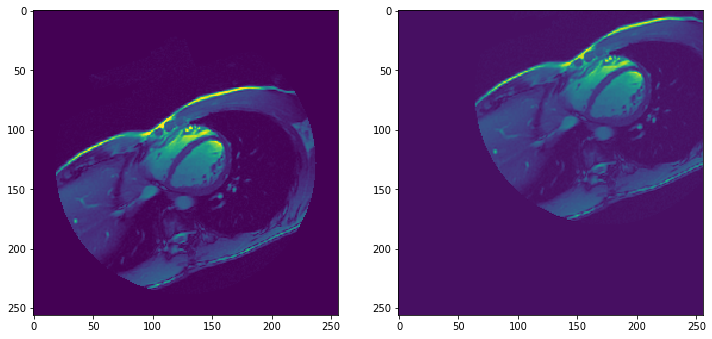

In [71]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0*7, # horizontal
                           d1*10)) # vertical

# Plot the original and adjusted images
fig, axes = plt.subplots(1,2, figsize=(12,7))
axes[0].imshow(im)
axes[1].imshow(xfm)


plt.show()

# Rotations
In cases where an object is angled or flipped, the image can be rotated. Using ndi.rotate(), the image is rotated from its center by the specified degrees from the right horizontal axis.

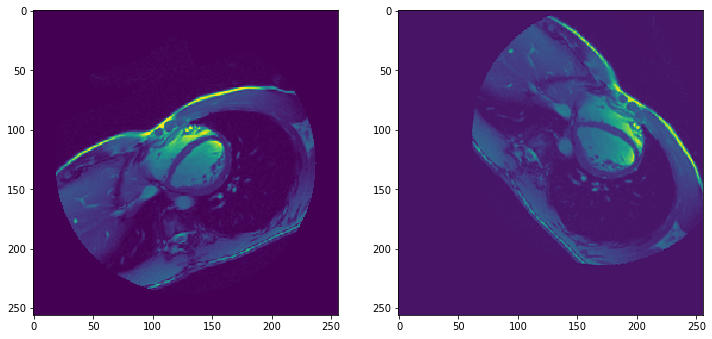

In [72]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=(-50,-7))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-70, reshape=False)

# Plot the original and rotated images
fig, axes = plt.subplots(1,2, figsize=(12,7))
axes[0].imshow(im)
axes[1].imshow(xfm)

plt.show()

The order of transformations makes a difference: rotating the image first will alter the object center, changing the amount of shift needed.

# Affine transform
An affine transformation matrix provides directions for up to four types of changes: translating, rotating, rescaling and shearing. The elements of the matrix map the coordinates from the input array to the output.

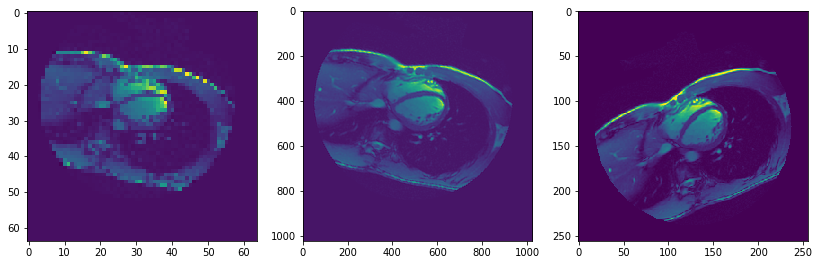

In [74]:
# Center and level image
xfm = ndi.shift(im, shift=(-20,-20)) # shifting the im 20 pixels up and 20 pixels down
xfm = ndi.rotate(xfm, angle=-35, # Rotating 35 degrees downward
                 reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=.25) # downsample image to 64,64
im_up = ndi.zoom(xfm, zoom=4) # upsampling to 1024, 1024

# Plot the images
fig, axes = plt.subplots(1,3, 
                         figsize=(14,6))
axes[0].imshow(im_dn) #downsampled
axes[1].imshow(im_up) #upsampled
axes[2].imshow(im) # nomal image

plt.show()

# Interpolation
Interpolation is how new pixel intensities are estimated when an image transformation is applied. It is implemented in SciPy using sets of spline functions.



Original shape: (256, 256)
Upsampled0shape: (1024, 1024)
Upsampled5shape: (1024, 1024)


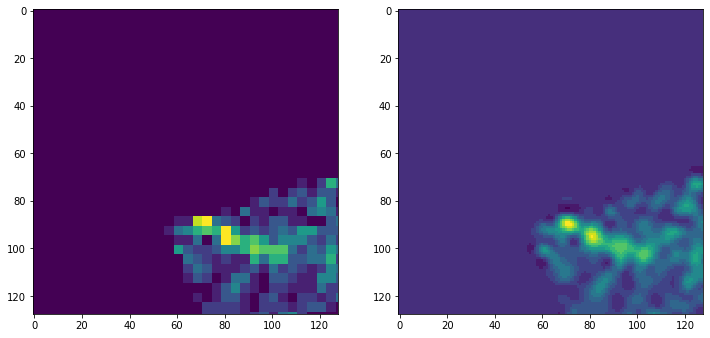

In [81]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled0shape:', up0.shape)
print('Upsampled5shape:', up5.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].imshow(up0[128:256, 128:256])
axes[1].imshow(up5[128:256, 128:256])

plt.show()

# Mean absolute error
Cost functions and objective functions output a single value that summarizes how well two images match.

The mean absolute error (MAE), for example, summarizes intensity differences between two images, with higher values indicating greater divergence.

In [83]:
im1 = imageio.imread(path+'chest-220.dcm')
im2 = imageio.imread(path+"chest-221.dcm")

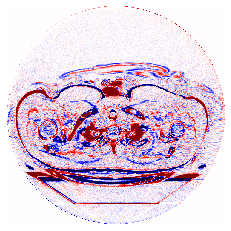

In [88]:
# Calculate image difference
err = im1 - im2

# Plot the difference
plt.imshow(err, cmap="seismic", vmin=-200, vmax=200)
plt.axis('off')
plt.show()

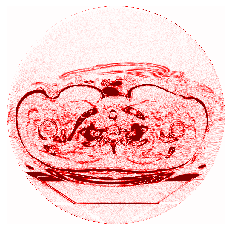

In [87]:
# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
plt.axis('off')
plt.show()

In [89]:
# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

MAE: 37.21159744262695


# Intersection of the union
Another cost function is the intersection of the union (IOU). The IOU is the number of pixels filled in both images (the intersection) out of the number of pixels filled in either image (the union).

In [ ]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    
    return i.sum() / u.sum()

# Identifying potential confounds
Once measures have been extracted, double-check for dependencies within your data. This is especially true if any image parameters (sampling rate, field of view) might differ between subjects, or you pull multiple measures from a single image.

In [91]:
import pandas as pd

df = pd.read_csv('oasis_all_volumes.csv')

In [92]:
# Print random sample of rows
print(df.sample(3))

                ID  age sex  alzheimers  brain_vol    skull_vol  \
239  OAS1_0269_MR1   72   F        True    838.703  1446.899302   
64   OAS1_0070_MR1   63   F       False    923.360  1400.213376   
192  OAS1_0213_MR1   48   F       False    925.859  1412.781004   

     gray_matter_vol  white_matter_vol  csf_vol  
239          437.149           401.554   36.504  
64           517.887           405.473   22.630  
192          482.465           443.394   13.130  


In [95]:
print(df.alzheimers.value_counts())

False    332
True      93
Name: alzheimers, dtype: int64


In [96]:
# Print a correlation table
print(df.corr())

                       age  alzheimers  brain_vol  skull_vol  gray_matter_vol  \
age               1.000000    0.542463  -0.719211  -0.141576        -0.776362   
alzheimers        0.542463    1.000000  -0.446771   0.014222        -0.460027   
brain_vol        -0.719211   -0.446771   1.000000   0.654829         0.957842   
skull_vol        -0.141576    0.014222   0.654829   1.000000         0.558978   
gray_matter_vol  -0.776362   -0.460027   0.957842   0.558978         1.000000   
white_matter_vol -0.550801   -0.371419   0.925833   0.696038         0.778223   
csf_vol           0.650422    0.517428  -0.371726   0.297889        -0.397840   

                  white_matter_vol   csf_vol  
age                      -0.550801  0.650422  
alzheimers               -0.371419  0.517428  
brain_vol                 0.925833 -0.371726  
skull_vol                 0.696038  0.297889  
gray_matter_vol           0.778223 -0.397840  
white_matter_vol          1.000000 -0.289189  
csf_vol               

# Testing group differences
Let's test the hypothesis that Alzheimer's Disease is characterized by reduced brain volume.

We can perform a two-sample t-test between the brain volumes of elderly adults with and without Alzheimer's Disease. In this case, the two population samples are independent from each other because they are all separate subjects.

t =  -10.270763061696771
p =  3.0435503446584287e-22


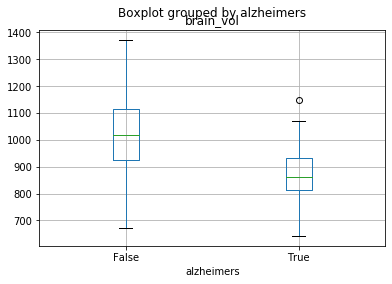

In [97]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

# Show boxplot of brain_vol differences
df.boxplot(column='brain_vol', by='alzheimers')
plt.show()

# Normalizing metrics


In [98]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Divide `df.brain_vol` by `df.skull_vol`
df['adj_brain_vol'] = df.brain_vol / df.skull_vol

# Select brain measures by Alzheimers group
brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

# Evaluate null hypothesis
results = ttest_ind(brain_alz, brain_typ)

## Hypothesis: Is there strong evidence that Alzheimer's Disease is marked by smaller brain size, relative to skull size?

In [101]:
print(results.pvalue)
print(results.statistic)

2.0192860861212413e-42
-15.311391823926563
